In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import beta

- beta is the conjugate prior of the binomial distribution

Ex: Flipping a Coin - Heads (H) and Tails (T)

- record is in a list [0,1,0,0,1] (tails is 0 and heads is 1)
- we update the alpha and beta as records are added

What is the update formula?





Assume that the coin is fair.

Initially alpha = 1 and beta = 1.

If the 1st record is heads, alpha = 2, beta = 1.
If the 2nd record is tails, alpha = 2, beta = 2. 

In [17]:
# assumption

alpha_prior = 1
beta_prior = 1

# simulate tosses
true_rate_of_heads = 0.6
n_trials = 10

records = np.random.binomial(1, true_rate_of_heads, n_trials)

records

array([0, 0, 0, 1, 1, 1, 1, 1, 0, 1])

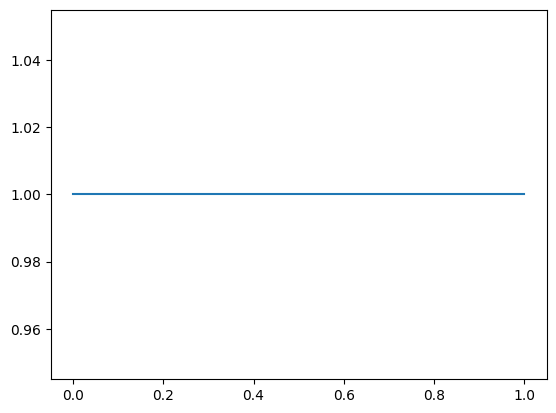

In [7]:
# check beta distribution at the beginning via plot

x = np.linspace(0,1,100)
y = beta.pdf(x, alpha_prior, beta_prior)

plt.plot(x,y)
plt.show()

In [10]:
# sequential learning

alpha_post = alpha_prior
beta_post = beta_prior

alpha_post += records[0]
beta_post += (1-records[0])

In [11]:
alpha_post, beta_post

(2, 1)

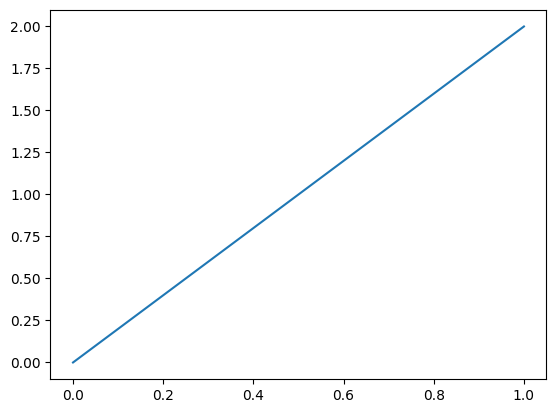

In [12]:
y = beta.pdf(x, alpha_post, beta_post)
plt.plot(x,y)
plt.show()

In [16]:
records

1

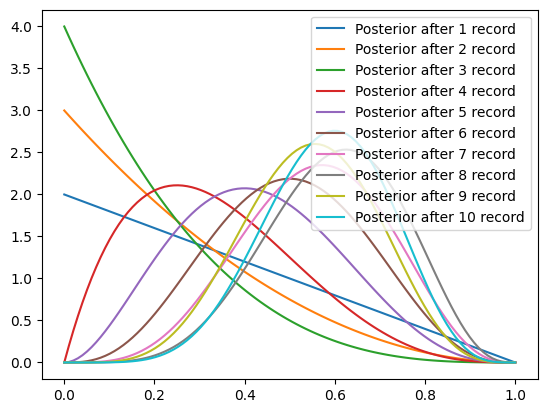

7 5


In [25]:
# iterate through the 10 trials

x = np.linspace(0,1,100)

alpha_prior = 1
beta_prior = 1

alpha_post = alpha_prior
beta_post = beta_prior

for i in range(10):

    alpha_post += records[i]
    beta_post += (1-records[i])
    y = beta.pdf(x, alpha_post, beta_post)
    plt.plot(x,y, label = f"Posterior after {i+1} record")
    
plt.legend()
plt.show()

print(alpha_post, beta_post)

    

In [27]:
mean_post = alpha_post / (alpha_post + beta_post)
mean_post

0.5833333333333334

Summary of Sequential Learning

1. Input
- prior distribution
- likelihood distribution (record of observations)

2. Output
- updated prior distribution

3. Sequential Learning
- update formula on the distribution parameters

For beta/binomial
alpha = alpha + record
beta = beta + (1-record)

- do this for all the records in the sequence